In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt
from numpy import array
from numpy import hstack
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

**Read File**

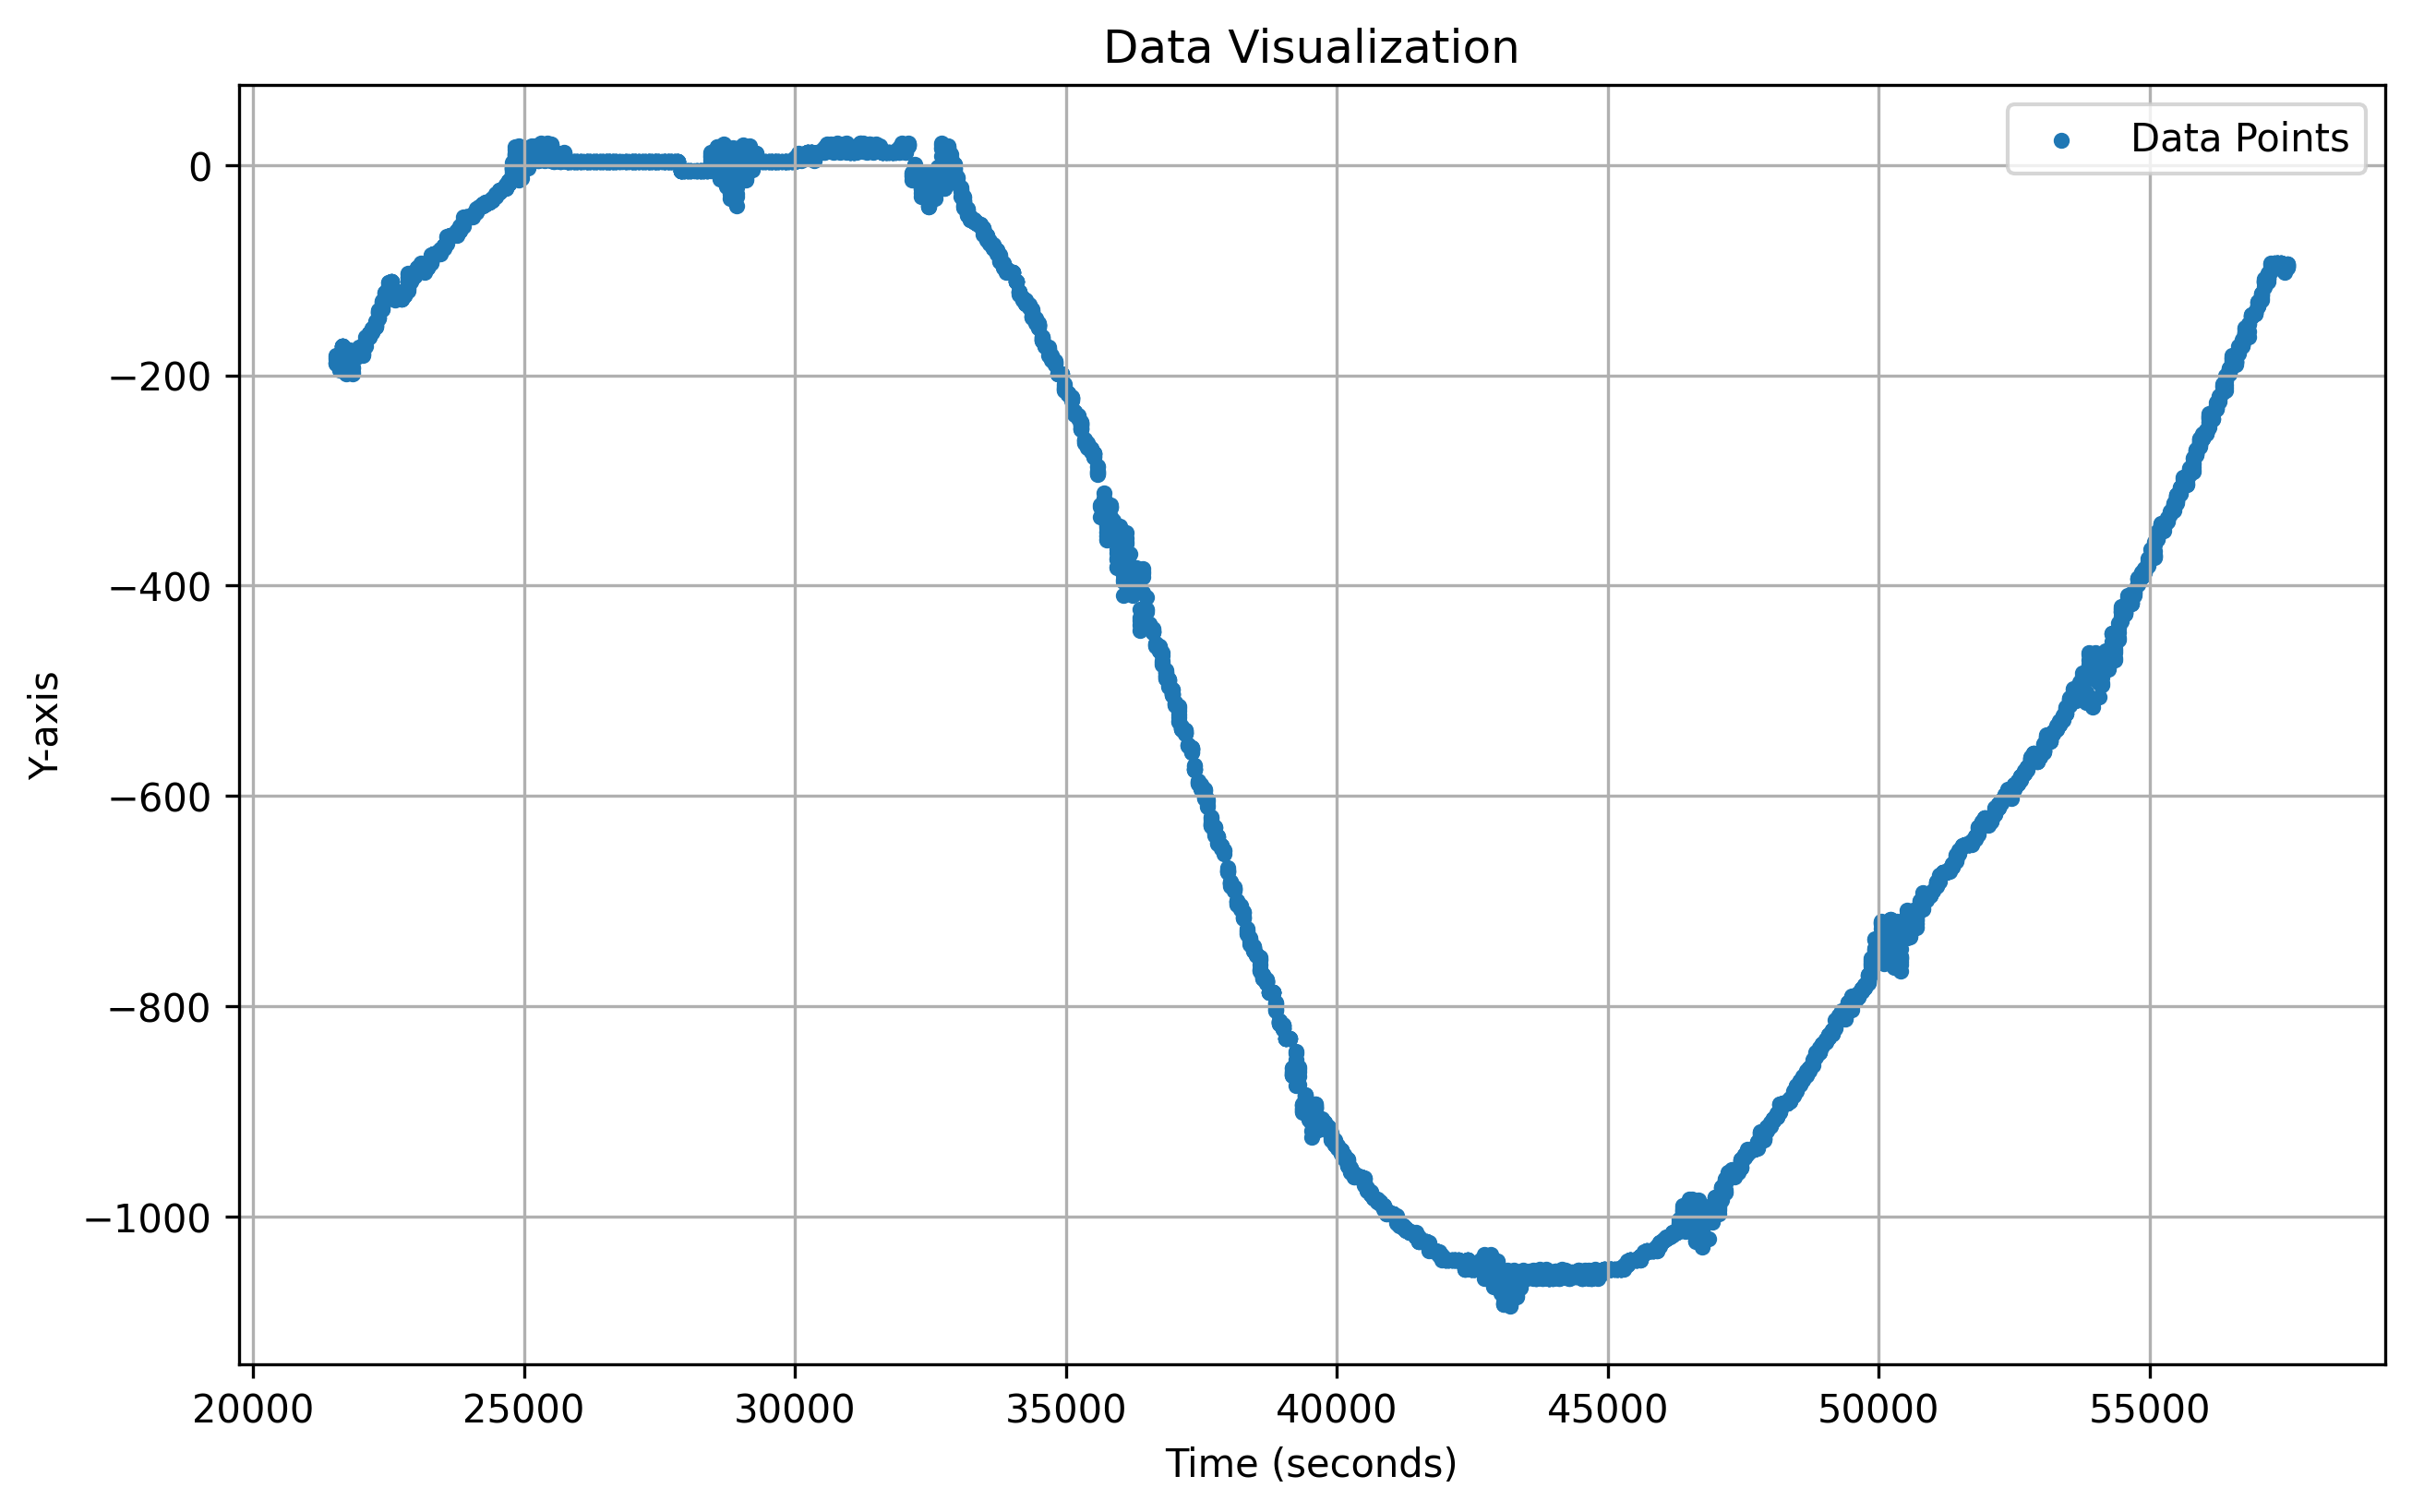

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
df = pd.read_csv('Grid_updated_extended.csv', header=None)
df[0] = pd.to_datetime(df[0]).dt.hour * 3600 + pd.to_datetime(df[0]).dt.minute * 60
X = df[[0]].values
y = df[1].values
z_scores = np.abs(stats.zscore(y))
threshold = 3
outliers = np.where(z_scores > threshold)[0]
X_clean = np.delete(X, outliers, axis=0)
y_clean = np.delete(y, outliers)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.25, random_state=1)

plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(X_test, y_test, marker='o', s=10, label='Data Points')
plt.xlabel('Time (seconds)')
plt.ylabel('Y-axis')
plt.title('Data Visualization')
plt.grid(True)
plt.legend()
plt.show()


**Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Data Scaling**

In [ ]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))



**MLP Regressor (ANN)**

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared: 0.9995861163745807
The RMSE is : 0.020737366001050302
The MAE is : 0.014161723561730476


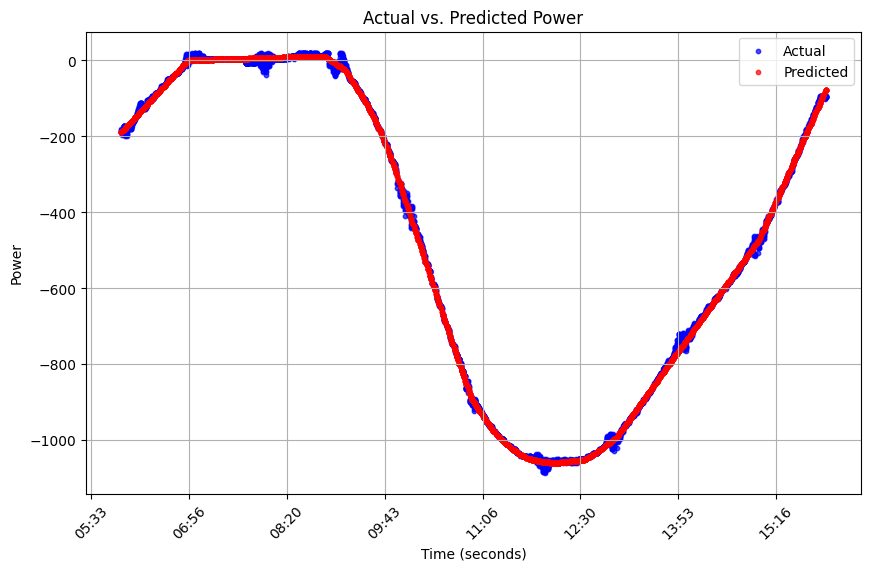

In [ ]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=1)
mlp_regressor.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = mlp_regressor.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f"R-squared: {r2}")
from sklearn.metrics import mean_squared_error
print("The RMSE is :", mean_squared_error(y_pred_scaled, y_test_scaled)**0.5)
from sklearn.metrics import mean_absolute_error
print("The MAE is :", mean_absolute_error(y_pred_scaled, y_test_scaled))
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue', alpha=0.7, marker='o', s=10)
plt.scatter(X_test, y_pred, label='Predicted', color='red', alpha=0.7, marker='o', s=10)
plt.xlabel('Time (seconds)')
plt.ylabel('Power')
plt.title('Actual vs. Predicted Power')
plt.legend()
plt.grid(True)

def format_seconds_as_hhmm(x, pos):
    hours = int(x / 3600)
    minutes = int((x % 3600) / 60)
    return f"{hours:02d}:{minutes:02d}"

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_seconds_as_hhmm))
plt.xticks(rotation=45)
plt.show()


**LSTM**

133/133 [==============================] - 1s 3ms/step
R-squared (R2): 0.5227268107642178
The RMSE is : 0.7042031919962022
The MAE is : 0.6144094937343532


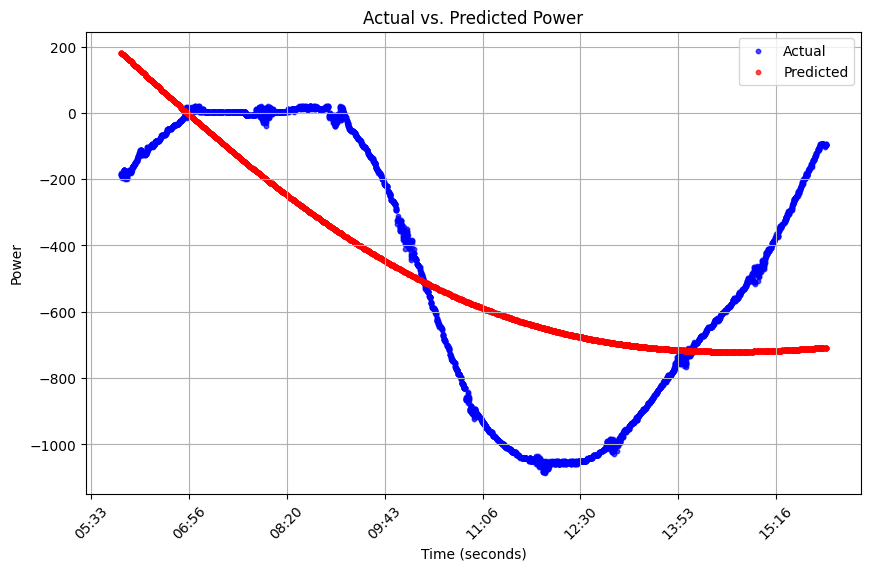

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))
model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train_scaled, epochs=1, batch_size=32, verbose=1)
y_pred_scaled = model.predict(X_test_reshaped)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")
from sklearn.metrics import mean_squared_error
print("The RMSE is :",mean_squared_error(y_pred_scaled,y_test_scaled)**0.5)
from sklearn.metrics import mean_absolute_error
print("The MAE is :",mean_absolute_error(y_pred_scaled,y_test_scaled))
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue', alpha=0.7, marker='o', s=10)
plt.scatter(X_test, y_pred, label='Predicted', color='red', alpha=0.7, marker='o', s=10)
plt.xlabel('Time (seconds)')
plt.ylabel('Power')
plt.title('Actual vs. Predicted Power')
plt.legend()
plt.grid(True)
def format_seconds_as_hhmm(x, pos):
    hours = int(x / 3600)
    minutes = int((x % 3600) / 60)
    return f"{hours:02d}:{minutes:02d}"
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_seconds_as_hhmm))
plt.xticks(rotation=45)
plt.show()

**Graph Plotting**

**GRU**

133/133 [==============================] - 1s 2ms/step
R-squared (R2): 0.535156287539039
The RMSE is : 0.6949730322275738
The MAE is : 0.6020507947155375


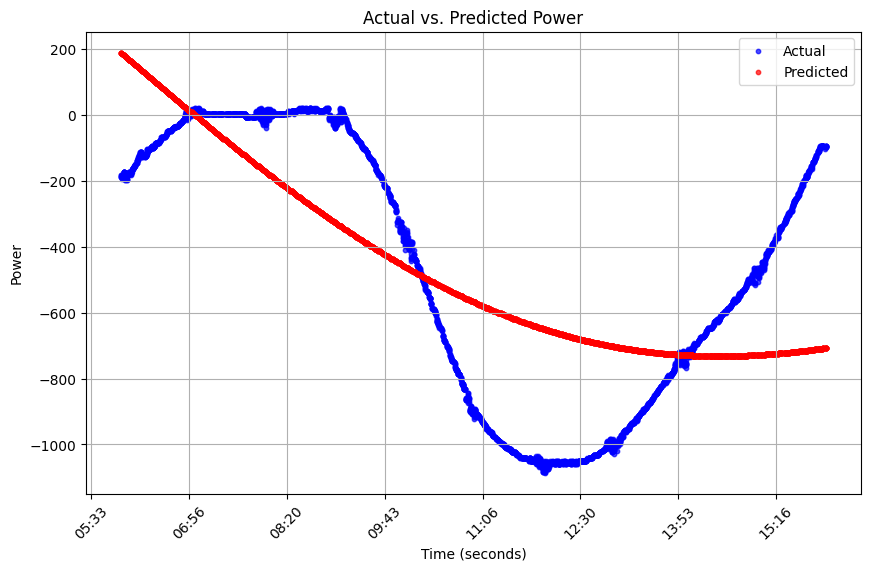

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense,GRU

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))
model = Sequential()
model.add(GRU(50, input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train_scaled, epochs=1, batch_size=32, verbose=1)
y_pred_scaled = model.predict(X_test_reshaped)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")
from sklearn.metrics import mean_squared_error
print("The RMSE is :",mean_squared_error(y_pred_scaled,y_test_scaled)**0.5)
from sklearn.metrics import mean_absolute_error
print("The MAE is :",mean_absolute_error(y_pred_scaled,y_test_scaled))
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue', alpha=0.7, marker='o', s=10)
plt.scatter(X_test, y_pred, label='Predicted', color='red', alpha=0.7, marker='o', s=10)
plt.xlabel('Time (seconds)')
plt.ylabel('Power')
plt.title('Actual vs. Predicted Power')
plt.legend()
plt.grid(True)
def format_seconds_as_hhmm(x, pos):
    hours = int(x / 3600)
    minutes = int((x % 3600) / 60)
    return f"{hours:02d}:{minutes:02d}"
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_seconds_as_hhmm))
plt.xticks(rotation=45)
plt.show()

**RNN**

133/133 [==============================] - 0s 2ms/step
R-squared (R2): 0.4060272959692883
The RMSE is : 0.7855932009396198
The MAE is : 0.6659372443598777


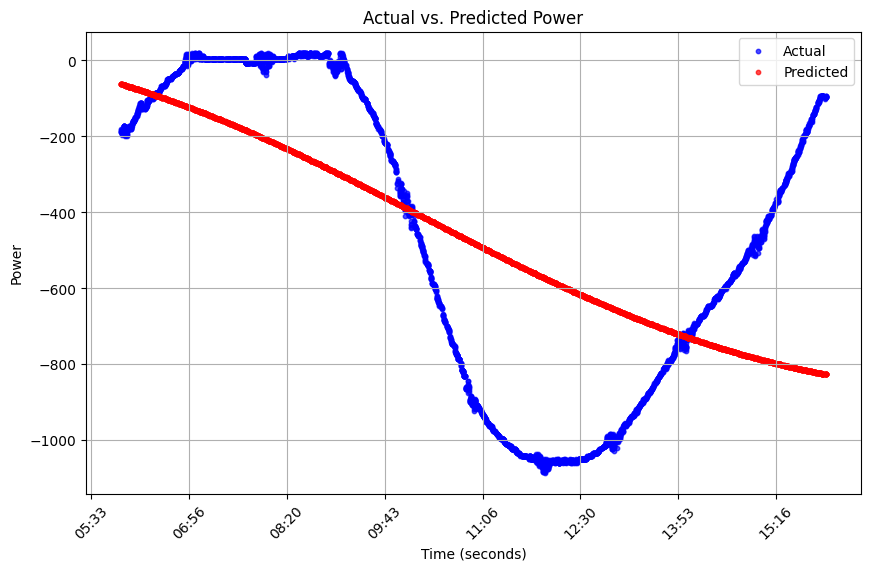

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense,GRU,SimpleRNN

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))
model = Sequential()
model.add(SimpleRNN(50, input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train_scaled, epochs=1, batch_size=32, verbose=1)
y_pred_scaled = model.predict(X_test_reshaped)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")
from sklearn.metrics import mean_squared_error
print("The RMSE is :",mean_squared_error(y_pred_scaled,y_test_scaled)**0.5)
from sklearn.metrics import mean_absolute_error
print("The MAE is :",mean_absolute_error(y_pred_scaled,y_test_scaled))
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue', alpha=0.7, marker='o', s=10)
plt.scatter(X_test, y_pred, label='Predicted', color='red', alpha=0.7, marker='o', s=10)
plt.xlabel('Time (seconds)')
plt.ylabel('Power')
plt.title('Actual vs. Predicted Power')
plt.legend()
plt.grid(True)
def format_seconds_as_hhmm(x, pos):
    hours = int(x / 3600)
    minutes = int((x % 3600) / 60)
    return f"{hours:02d}:{minutes:02d}"
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_seconds_as_hhmm))
plt.xticks(rotation=45)
plt.show()